### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Basic Processing

In [2]:
df = pd.read_csv('data/processed/1.1_initial_data_assessment_done.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Visualize Class Distribution

<Axes: xlabel='Churn'>

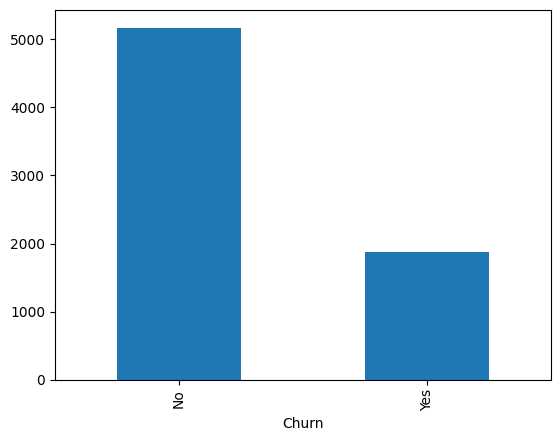

In [3]:
df['Churn'].value_counts().plot(kind='bar')

### Calculate Imbalance Ratio

In [7]:
churn_rate = df['Churn'].value_counts(normalize=True)*100
churn_rate

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [10]:
majority_class = churn_rate.idxmax()
minority_class = churn_rate.idxmin()

imbalance_ratio = churn_rate[majority_class] / churn_rate[minority_class]
imbalance_ratio

np.float64(2.76832530765115)

In imbalanced datasets, accuracy becomes unreliable as even though accuracy can be high, the minority class could be ignored. Evaluation metrics such as precision, recall and F1-score matter more in class imbalanced situations

### Analyze Churn Patterns

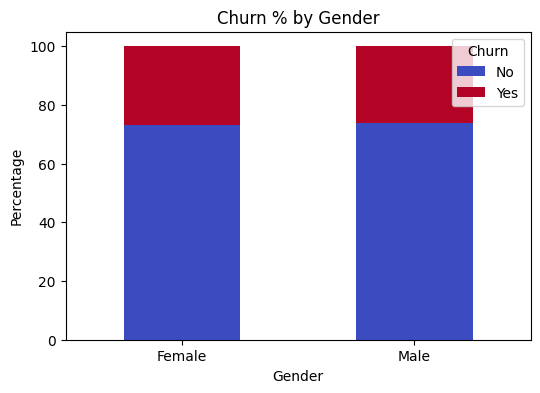

In [11]:
# Group by Gender and Churn, then count
grouped = df.groupby(["gender", "Churn"]).size().unstack()

# Convert to percentages (row-wise)
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot 100% stacked bar chart
percentages.plot(kind="bar", stacked=True, figsize=(6,4), colormap="coolwarm")

plt.title("Churn % by Gender")
plt.ylabel("Percentage")
plt.xlabel("Gender")
plt.legend(title="Churn", loc="upper right")
plt.xticks(rotation=0)
plt.show()

In [ ]:
numeric_